In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df = pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


CRIM: Crime rate per capita.

ZN: Proportion of residential land zoned for large lots.

INDUS: Proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (1 if tract bounds river, 0 otherwise).

NOX: Nitric oxide concentration (pollution).

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built before 1940.

DIS: Weighted distance to employment centers.

RAD: Index of accessibility to radial highways.

TAX: Property tax rate.

PTRATIO: Pupil-teacher ratio by town.

B: $1000(Bk - 0.63)^2$, where $Bk$ is the proportion of Black residents. 

LSTAT: % of lower status population.

MEDV: Median value of owner-occupied homes (in $1000s).

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [121]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

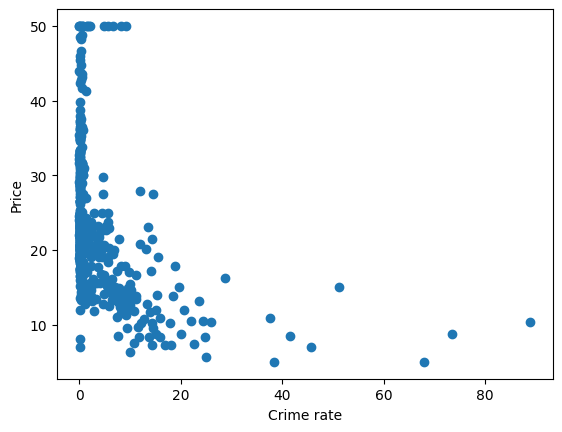

In [122]:
plt.scatter(df['CRIM'], df['MEDV'])
plt.xlabel('Crime rate')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='MEDV'>

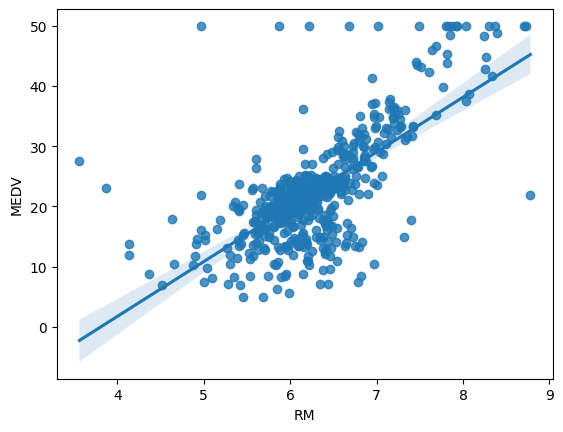

In [123]:
import seaborn as sns
sns.regplot(x="RM", y="MEDV", data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

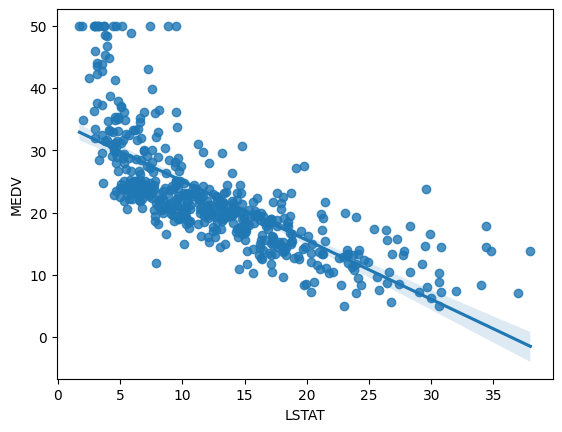

In [124]:
sns.regplot(x="LSTAT", y="MEDV", data=df)

<Axes: xlabel='CHAS', ylabel='MEDV'>

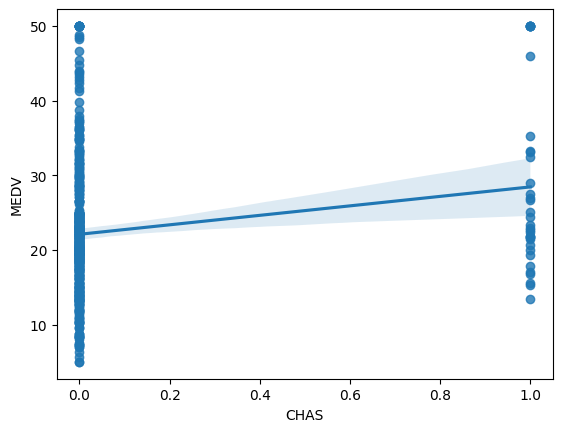

In [125]:
sns.regplot(x="CHAS", y="MEDV", data=df)
#not correlated at all

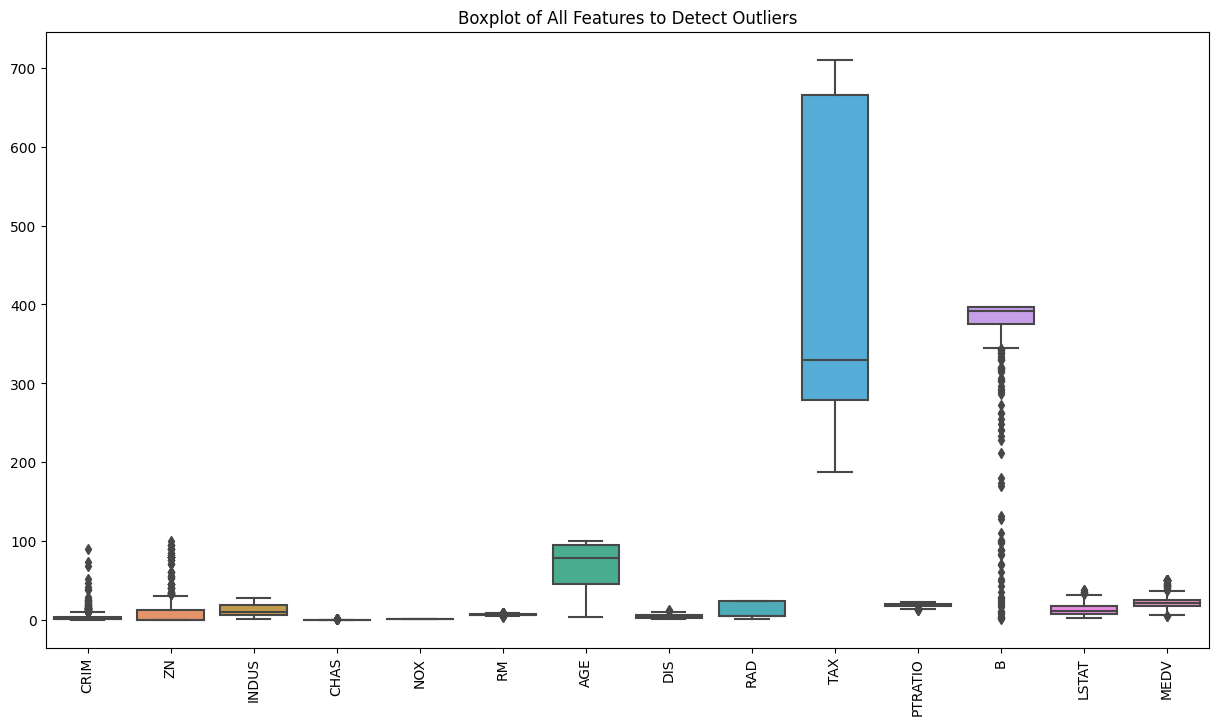

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame (without categorical columns)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of All Features to Detect Outliers')
plt.show()

In [127]:
def cap_outliers_iqr(dataframe):
    df_capped = dataframe.copy()
    for col in df_capped.select_dtypes(include='number').columns:
        if col == 'MEDV':
            continue  # Don't cap target variable
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values
        df_capped[col] = df_capped[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df_capped

# Apply capping
df = cap_outliers_iqr(df)

In [128]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [129]:
# df = df.drop('TAX', axis=1)
# df = df.drop(['NOX', 'DIS', 'RAD'], axis=1)

In [130]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [131]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [132]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

## print the coefficients and the intercept
print(lr.coef_)
print(lr.intercept_)

## on which parameters the model has been trained
print(lr.get_params())

### Prediction With Test Data
reg_pred=lr.predict(X_test)

[-1.82765839e+00  3.74467526e-01  4.52238847e-01  1.77635684e-15
 -1.47778331e+00  2.91529043e+00 -2.91161233e-01 -2.75685258e+00
  2.67291633e+00 -1.34161987e+00 -2.25190827e+00  2.76320034e-01
 -4.22075884e+00]
23.015819209039545
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [133]:
reg_pred

array([31.48783054, 35.89918923, 17.32306479, 27.16182478, 20.24247759,
       25.13727191, 18.81099261, 15.09648058, 24.62765311, 22.4072303 ,
       23.97091322, 21.09298264,  2.29413286, 23.78016723, 20.3478081 ,
       28.40470245, 21.67428402,  4.01070391, 42.70002432, 17.25829539,
       29.30049942, 32.24041008, 10.75268936, 25.71111196, 18.69030165,
       14.89313284, 24.93187845, 18.59717524, 20.5971493 , 20.91540431,
       23.91893273, 27.25194065, 27.52584864, 20.11885312, 17.55546905,
       21.15457891, 34.18459634, 21.44163383, 22.36906833, 26.61231004,
       14.7760994 , 34.37948194, 43.52876048, 18.58486222, 29.25822978,
       17.27164543, 13.81087883, 28.10563461, 21.65299701, 33.4606433 ,
       24.11511543, 37.9535268 , 16.04698826, 28.26114926, 44.09250169,
       25.02351209, 20.16154609, 33.68543751, 26.80677458, 13.7463198 ,
       24.92895057, 31.77329396, 34.64004613, 17.14069233, 23.68204967,
       13.87554207, 20.39871518, 27.99936516, 31.80060372, 17.00

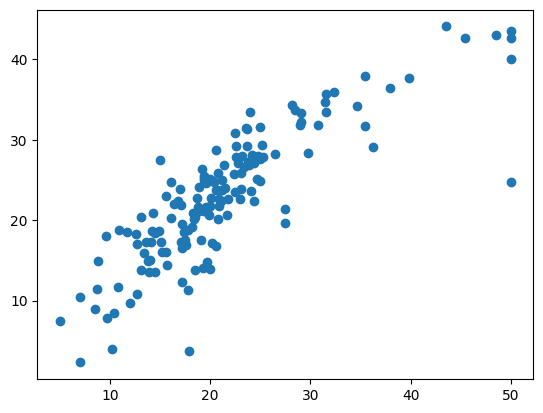

In [134]:
plt.scatter(y_test,reg_pred)

In [135]:
residuals = y_test-reg_pred
residuals

173    -7.887831
274    -3.499189
491    -3.723065
72     -4.361825
452    -4.142478
         ...    
441    -0.201428
23      0.930222
225    10.001763
433    -6.534143
447    -5.639192
Name: MEDV, Length: 152, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


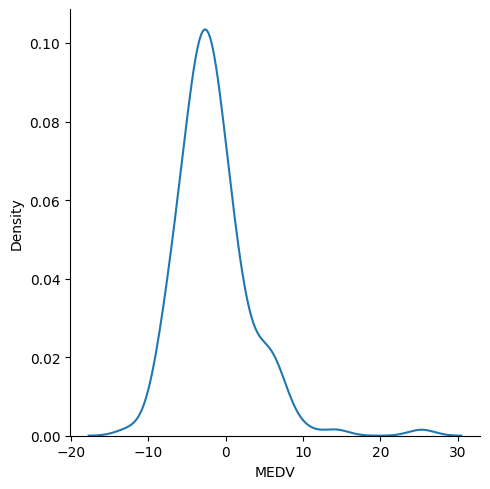

In [136]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

**Assumptions**

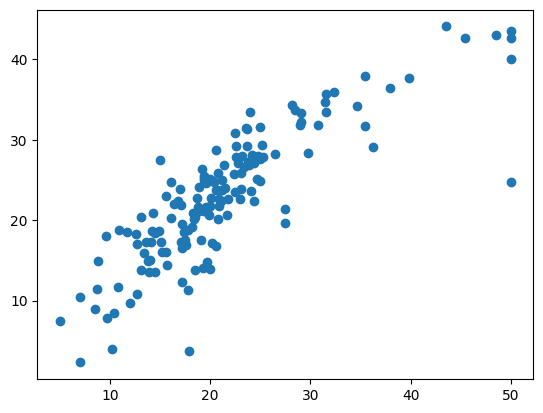

In [137]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.8447631670245004
24.48975873857341
4.948712836543803


In [139]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6713361785343092


In [140]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6403750939034832

**Save model**

In [142]:
import pickle
pickle.dump(lr,open('regmodel.pkl','wb'))
# pickled_model=pickle.load(open('regmodel.pkl','rb'))